<a href="https://colab.research.google.com/github/MMS-1017/LGMVIP--DataScience/blob/main/Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# importing essential libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [28]:
df= pd.read_csv('/content/Stock.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-18,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-18,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-18,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-18,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-18,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [29]:
#rows and columns
df.shape

(2035, 8)

In [30]:
#important Statistics
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [31]:
#checking for missings
df.isnull().sum().sum()

0

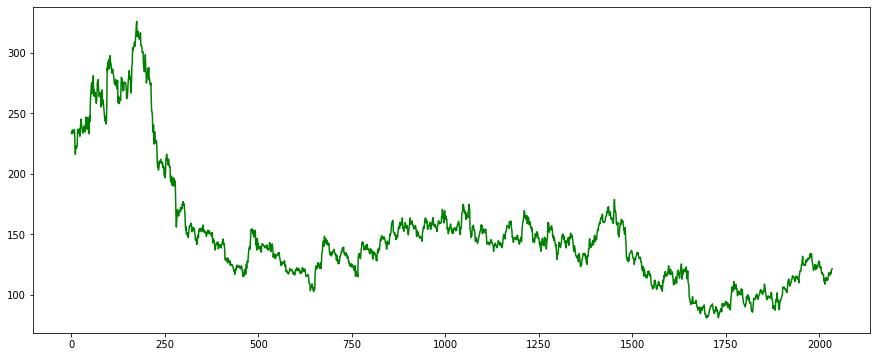

In [32]:
#visualization
close = df.reset_index()['Close']
plt.figure(figsize=(15,6))
plt.plot(close, c= "g")
plt.show()

In [36]:
scale = MinMaxScaler(feature_range=(0,1))
close = scale.fit_transform(np.array(close).reshape(-1,1))
close.shape

(2035, 1)

In [39]:
train = int(len(close)*0.7)
test = len(close) - train
train_data, test_data = close[0:train,:], close[train:len(close),:1]

In [42]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [43]:
#creating the LTSM Stacked Model
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [44]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [45]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)


Epoch 1/100
21/21 [==============================] - 12s 257ms/step - loss: 0.0254 - val_loss: 0.0047
Epoch 2/100
21/21 [==============================] - 5s 226ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 3/100
21/21 [==============================] - 5s 229ms/step - loss: 0.0016 - val_loss: 7.6524e-04
Epoch 4/100
21/21 [==============================] - 6s 299ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/100
21/21 [==============================] - 6s 301ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
21/21 [==============================] - 7s 347ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
21/21 [==============================] - 12s 551ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
21/21 [==============================] - 6s 267ms/step - loss: 0.0011 - val_loss: 7.7698e-04
Epoch 9/100
21/21 [==============================] - 5s 226ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
21/21 [==============================] - 5s 227ms/step - loss: 0.001

In [46]:
# checking performance matrix
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
# back to original form
train_predict = scale.inverse_transform(train_predict)
test_predict = scale.inverse_transform(test_predict)
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

0.015367481148718012

In [47]:
#Test RMSE Data
math.sqrt(mean_squared_error(y_test, test_predict))

0.012468820836967818

In [48]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
#Shift test prediction for plotting
testPredictPlot = np.empty_like(close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(close) - 1, :] = test_predict

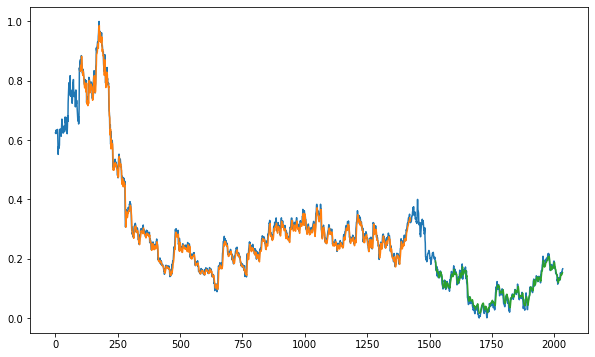

green is the Predicted Data
blue is the Complete Data
orange is the Train Data


In [49]:
#Plot baseline and predictions
plt.figure(figsize=(10,6))

plt.plot(scale.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("green is the Predicted Data")
print("blue is the Complete Data")
print("orange is the Train Data")

In [50]:
#Predict  next 28 days of stock prices
len(test_data), x_test.shape

(611, (510, 100, 1))

In [51]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 202)